In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
import os
import glob

In [3]:
# Import pandas
import pandas as pd

In [4]:
# Load R magic
%load_ext rpy2.ipython
# Import ggplot2
%R require(ggplot2);

In [5]:
# If experiment parameters change, modify this function
def AddParametersAsColumns(df, folder):
    expParams = folder.split('/')[-1].split('.')
    
    cloudParams = expParams[1].split('_')
    df['groupSizeDist'] = cloudParams[10]
    df['placementDist'] = cloudParams[11]
    df['placementNumHostsPerLeaf'] = int(cloudParams[12])
    df['seed'] = int(cloudParams[15])
    
    optimizerParams_0 = expParams[2].split('_')
    node_type_0 = optimizerParams_0[7]
    df['%sAlgorithm' % node_type_0] = optimizerParams_0[0]
    df['%sNumBitmaps' % node_type_0] = int(optimizerParams_0[1])
    df['%sNumNodesPerBitmap' % node_type_0] = int(optimizerParams_0[2])
    df['%sRedundancyPerBitmap' % node_type_0] = int(optimizerParams_0[3])
    df['%sNumRules' % node_type_0] = int(optimizerParams_0[4])
    
    if len(expParams) > 3:
        optimizerParams_1 = expParams[3].split('_')
        node_type_1 = optimizerParams_1[7]
        df['%sAlgorithm' % node_type_1] = optimizerParams_1[0]
        df['%sNumBitmaps' % node_type_1] = int(optimizerParams_1[1])
        df['%sNumNodesPerBitmap' % node_type_1] = int(optimizerParams_1[2])
        df['%sRedundancyPerBitmap' % node_type_1] = int(optimizerParams_1[3])
        df['%sNumRules' % node_type_1] = int(optimizerParams_1[4])
    
# Turns all files of a given filname across a set of folders into a single dataframe
def DataSetAsDataFrame(filename, folders, headers, header=None):
    # Read dataset as dataframe
    def ReadDataSet(folder):
        df = pd.read_csv(folder + '/' + filename, sep=',', header=header, names=headers)
        AddParametersAsColumns(df, folder)
        return df
    # Get the list of dataframes
    dfs = map(ReadDataSet, folders)
    # Combine into a single dataframe
    df = pd.concat(dfs)
    return df

In [6]:
%%R 
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [7]:
directory = '../../output/'
folders = glob.glob(directory + 'logs*')
dynamic_folders = glob.glob(directory + 'dynamic-logs*')

In [8]:
vmCountPerTenant = DataSetAsDataFrame('vm_count_per_tenant.csv', 
                                      folders, 
                                      ['vmCount'])

In [9]:
vmCountPerTenant['vmCount'].describe()

count    3000.000000
mean      179.701000
std       432.859193
min        10.000000
25%        46.000000
50%        97.000000
75%       182.000000
max      4999.000000
Name: vmCount, dtype: float64

In [10]:
groupCountPerTenant = DataSetAsDataFrame('group_count_per_tenant.csv', 
                                         folders, ['groupCount'])

In [11]:
groupCountPerTenant['groupCount'].describe()

count    3000.000000
mean      332.833333
std       802.921490
min        18.000000
25%        85.000000
50%       179.000000
75%       337.000000
max      9272.000000
Name: groupCount, dtype: float64

In [12]:
groupSizePerGroupPerTenant = DataSetAsDataFrame('group_size_per_group_per_tenant.csv', 
                                                folders, ['groupSize'])

In [13]:
groupSizePerGroupPerTenant['groupSize'].describe()

count    998500.000000
mean        614.033872
std        1015.831472
min           5.000000
25%          54.000000
50%         141.000000
75%         529.000000
max        4999.000000
Name: groupSize, dtype: float64

In [14]:
leafCountPerGroupPerTenant = DataSetAsDataFrame('leaf_count_per_group_per_tenant.csv', 
                                                folders, ['leafCount'])

In [15]:
leafCountPerGroupPerTenant['leafCount'].describe()

count    998500.000000
mean         53.899307
std          35.955542
min           3.000000
25%          33.000000
50%          46.000000
75%          48.000000
max         192.000000
Name: leafCount, dtype: float64

In [16]:
podCountPerGroupPerTenant = DataSetAsDataFrame('pod_count_per_group_per_tenant.csv', 
                                                folders, ['podCount'])

In [17]:
podCountPerGroupPerTenant['podCount'].describe()

count    998500.000000
mean          1.357768
std           0.670669
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: podCount, dtype: float64

In [18]:
podsAlgorithmElapseTime = DataSetAsDataFrame('pods_algorithm_elapse_time.csv', 
                                              folders, ['elapseTime'])

In [19]:
podsAlgorithmElapseTime['elapseTime'].describe()

count    9.985000e+05
mean     3.096680e-06
std      4.864578e-05
min      4.796311e-08
25%      1.206063e-07
50%      6.090850e-07
75%      4.475936e-06
max      1.108134e-02
Name: elapseTime, dtype: float64

In [20]:
leafsAlgorithmElapseTime = DataSetAsDataFrame('leafs_algorithm_elapse_time.csv', 
                                              folders, ['elapseTime'])

In [21]:
leafsAlgorithmElapseTime['elapseTime'].describe()

count    9.849600e+04
mean     2.805337e-04
std      2.655022e-04
min      8.195639e-08
25%      1.091224e-04
50%      1.856044e-04
75%      3.612977e-04
max      9.030196e-03
Name: elapseTime, dtype: float64

In [20]:
groupsCoveredWithBitmapsOnlyForPods = DataSetAsDataFrame('groups_covered_with_bitmaps_only_for_pods.csv', 
                                                         folders, 
                                                         ['groupsCovered', 'groupsCoveredWithoutDefaultBitmap'],
                                                         header=0)

In [21]:
groupsCoveredWithBitmapsOnlyForPods

,groupsCovered,groupsCoveredWithoutDefaultBitmap,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules
0,929689,920760,uniform,colocate-uniform,-1,0,random-fuzzy-match,1,3,6,10000


In [24]:
groupsCoveredWithBitmapsOnlyForLeafs = DataSetAsDataFrame('groups_covered_with_bitmaps_only_for_leafs.csv', 
                                                         folders, 
                                                         ['groupsCovered', 'groupsCoveredWithoutDefaultBitmap'],
                                                         header=0)

In [25]:
groupsCoveredWithBitmapsOnlyForLeafs

,groupsCovered,groupsCoveredWithoutDefaultBitmap,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules
0,20031,20031,uniform,colocate-uniform,48,0,random-fuzzy-match,2,3,6,1000,random-fuzzy-match,10,3,12,10000


In [22]:
ruleCountForPods = DataSetAsDataFrame('rule_count_for_pods.csv', 
                                      folders, ['numRules'])

In [23]:
ruleCountForPods['numRules'].describe()

count       12.000000
mean      7808.166667
std       2653.815155
min       3117.000000
25%       5957.750000
50%       8823.500000
75%      10000.000000
max      10000.000000
Name: numRules, dtype: float64

In [28]:
ruleCountForLeafs = DataSetAsDataFrame('rule_count_for_leafs.csv', 
                                       folders, ['numRules'])

In [29]:
ruleCountForLeafs['numRules'].describe()

count     576.000000
mean     5230.520833
std      1111.163817
min      2284.000000
25%      4782.500000
50%      5578.000000
75%      6074.250000
max      6989.000000
Name: numRules, dtype: float64

In [24]:
trafficOverheadPerGroupPerTenantForPods = DataSetAsDataFrame(
    'traffic_overhead_per_group_per_tenant_for_pods.csv', folders, ['trafficOverhead'])

In [29]:
trafficOverheadPerGroupPerTenantForPods['trafficOverhead'].head(2)

0    0.0
1    0.0
Name: trafficOverhead, dtype: float64

In [25]:
trafficOverheadPerGroupPerTenantForPods['trafficOverhead'].describe()

count    998500.000000
mean          0.001527
std           0.017874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: trafficOverhead, dtype: float64

In [32]:
trafficOverheadPerGroupPerTenantForLeafs = DataSetAsDataFrame(
    'traffic_overhead_per_group_per_tenant_for_leafs.csv', folders, ['trafficOverhead'])

In [33]:
trafficOverheadPerGroupPerTenantForLeafs['trafficOverhead'].describe()

count    98496.000000
mean         0.471776
std          0.418841
min          0.000000
25%          0.068641
50%          0.386364
75%          0.766667
max          1.850000
Name: trafficOverhead, dtype: float64

In [26]:
traffic = DataSetAsDataFrame('traffic_per_group_per_tenant.csv', 
                             folders, 
                             ['multicastTraffic', 'unicastTraffic', 'overlayTraffic', 'baseeratTraffic'],
                             header=0)

FileNotFoundError: File b'../../output/logs.12_48_48_20_3000_10_5000_expon_1000000_5_uniform_colocate-uniform_-1_True_5_0.random-fuzzy-match_1_3_6_10000_2_3_pods/traffic_per_group_per_tenant.csv' does not exist

In [38]:
temp = traffic[['multicastTraffic', 'unicastTraffic', 'overlayTraffic', 'baseeratTraffic']].sum()

In [39]:
temp['unicastTraffic']/temp['multicastTraffic']

5.4762259277022451

In [40]:
temp['overlayTraffic']/temp['multicastTraffic']

2.1483915104809723

In [41]:
temp['baseeratTraffic']/temp['multicastTraffic']

1.0804541889718486

In [8]:
switchUpdateCount = DataSetAsDataFrame('switch_update_count.csv', 
                                       dynamic_folders, 
                                       ['updates', 'switch', 'event'],
                                       header=0)

In [9]:
switchUpdateCount.head(2)

,updates,switch,event,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules
0,46,virtual,join,uniform,colocate-uniform,48,0,random-fuzzy-match,2,3,6,1000,random-fuzzy-match,10,3,12,10000
1,1,virtual,join,uniform,colocate-uniform,48,0,random-fuzzy-match,2,3,6,1000,random-fuzzy-match,10,3,12,10000


In [13]:
switchUpdateCount[
    (switchUpdateCount['switch'] == 'pod') & 
    (switchUpdateCount['event'] == 'join')
]['updates'].describe()

count    475421.000000
mean          0.000726
std           0.038227
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: updates, dtype: float64

In [14]:
switchUpdateCount[
    (switchUpdateCount['switch'] == 'pod') & 
    (switchUpdateCount['event'] == 'leave')
]['updates'].describe()

count    476938.000000
mean          0.000946
std           0.043066
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: updates, dtype: float64

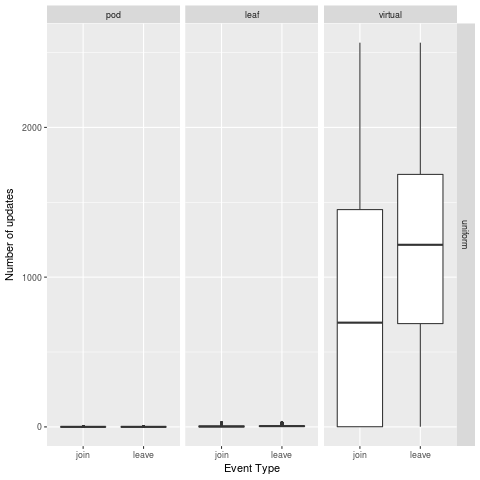

In [15]:
%%R -i switchUpdateCount
ggplot(switchUpdateCount) +
   geom_boxplot(aes(y=updates, x=factor(event)),
                outlier.size=0.5) +
   facet_grid(groupSizeDist ~ factor(switch, levels=c('pod','leaf','virtual'))) +
   xlab("Event Type") +
   ylab("Number of updates") +
   plotTheme
# ggsave(plt, file="switch_event_types_to_update_count.jpg")

In [16]:
switchUpdateCountNormalized = DataSetAsDataFrame('switch_update_count_normalized.csv', 
                                       dynamic_folders, 
                                       ['updates', 'switch', 'event'],
                                       header=0)

In [17]:
switchUpdateCountNormalized.head(2)

,updates,switch,event,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules
0,0.500000,virtual,join,uniform,colocate-uniform,48,0,random-fuzzy-match,2,3,6,1000,random-fuzzy-match,10,3,12,10000
1,0.008065,virtual,join,uniform,colocate-uniform,48,0,random-fuzzy-match,2,3,6,1000,random-fuzzy-match,10,3,12,10000


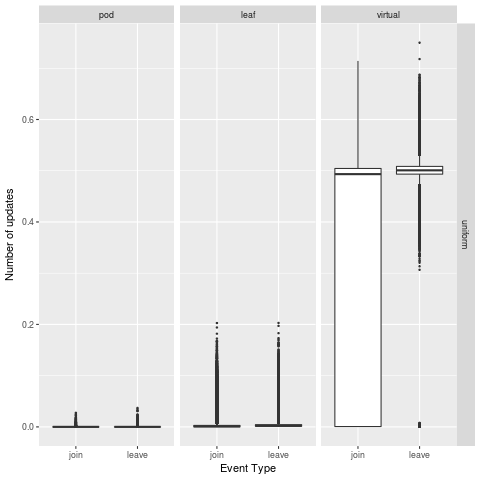

In [18]:
%%R -i switchUpdateCountNormalized
ggplot(switchUpdateCountNormalized) +
   geom_boxplot(aes(y=updates, x=factor(event)),
                outlier.size=0.5) +
   facet_grid(groupSizeDist ~ factor(switch, levels=c('pod','leaf','virtual'))) +
   xlab("Event Type") +
   ylab("Number of updates") +
   plotTheme
# ggsave(plt, file="switch_event_types_to_update_count.jpg")

---

In [9]:
ruleCountPerLeaf = DataSetAsDataFrame('rule_count_per_leaf.csv', 
                                      folders, ['leafId', 'numRules'])

In [10]:
groupCountPerTenant = DataSetAsDataFrame('group_count_per_tenant.csv', 
                                         folders, ['tenantId', 'groupCount'])

In [11]:
groupSizePerGroupPerTenant = DataSetAsDataFrame('group_size_per_group_per_tenant.csv', 
                                                folders, ['groupId', 'groupSize'])

In [12]:
groupsCoveredWithBitmapsOnly = DataSetAsDataFrame('groups_covered_with_bitmaps_only.csv', 
                                                  folders, 
                                                  ['index', 'groupsCovered', 'groupsCoveredWithoutDefaultBitmap'],
                                                  header=0)

In [13]:
trafficOverhead = DataSetAsDataFrame('traffic_overhead.csv', 
                                     folders, 
                                     ['index', 'trafficOverhead'])

In [14]:
leafSpineTraffic = DataSetAsDataFrame('leaf_spine_traffic_per_group_per_tenant.csv', 
                                      folders, 
                                      ['groupId', 'multicastTraffic', 'unicastTraffic', 'overlayTraffic',
                                       'baseeratTraffic'],
                                       header=0)

In [15]:
vmCountPerTenant = DataSetAsDataFrame('vm_count_per_tenant.csv', 
                                      folders, 
                                      ['tenantId', 'vmCount'])

In [16]:
ruleCountPerLeaf.head(2)

,leafId,numRules,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,10000,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000
1,1,10000,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000


In [17]:
groupCountPerTenant.head(2)

,tenantId,groupCount,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,34,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000
1,1,8,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000


In [18]:
groupSizePerGroupPerTenant.head(2)

,groupId,groupSize,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,103,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000
1,1,107,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000


In [19]:
vmCountPerTenant.head(2)

,tenantId,vmCount,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,184,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000
1,1,46,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000


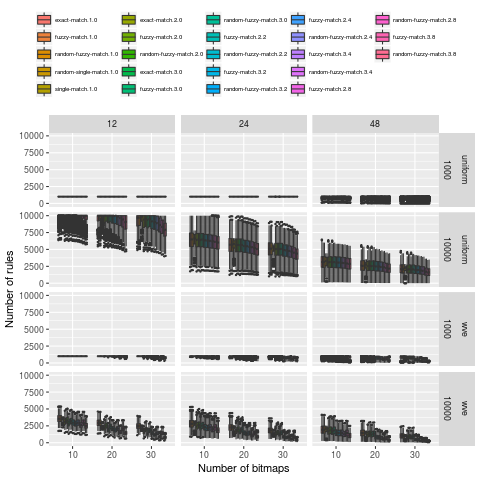

In [10]:
%%R -i ruleCountPerLeaf
ggplot(ruleCountPerLeaf) +
   geom_boxplot(aes(y=numRules, x=factor(numBitmaps), 
                    fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
                outlier.size=0.5) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
   xlab("Number of bitmaps") +
   ylab("Number of rules") +
   plotTheme

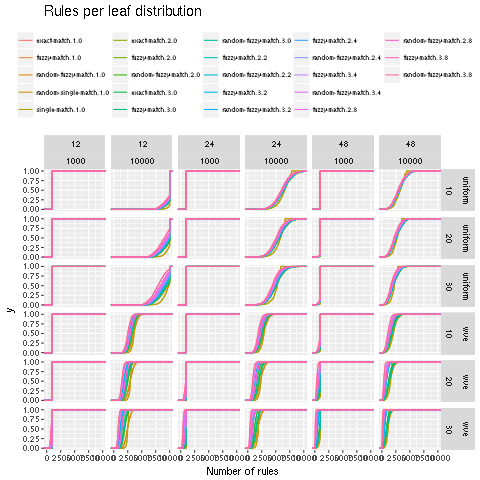

In [21]:
%%R -i ruleCountPerLeaf
ggplot(ruleCountPerLeaf) +
   stat_ecdf(aes(x=numRules, col=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
   facet_grid(groupSizeDist * numBitmaps ~ colocateNumHostsPerLeaf * numRulesPerLeaf) +
   ggtitle("Rules per leaf distribution") +
   xlab("Number of rules") +
   plotTheme

In [22]:
groupCountPerTenant[
    (groupCountPerTenant['algorithm'] == 'exact-match') &
    (groupCountPerTenant['groupSizeDist'] == 'wve') &
    (groupCountPerTenant['colocateNumHostsPerLeaf'] == 24) & 
    (groupCountPerTenant['numBitmaps'] == 10) & 
    (groupCountPerTenant['numLeafsPerBitmap'] == 1) &
    (groupCountPerTenant['numRulesPerLeaf'] == 1000)
]['groupCount'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])

0.0000      1.0000
0.5000     17.0000
0.9900    516.2500
0.9990    909.0140
0.9999    926.1003
1.0000    927.0000
Name: groupCount, dtype: float64

In [23]:
groupSizePerGroupPerTenant[
    (groupSizePerGroupPerTenant['algorithm'] == 'exact-match') &
    (groupSizePerGroupPerTenant['colocateNumHostsPerLeaf'] == 24) & 
    (groupSizePerGroupPerTenant['numBitmaps'] == 10) & 
    (groupSizePerGroupPerTenant['numLeafsPerBitmap'] == 1) &
    (groupSizePerGroupPerTenant['numRulesPerLeaf'] == 1000)
].groupby('groupSizeDist')['groupSize'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])

groupSizeDist        
uniform        0.0000       5.0000
               0.5000     143.0000
               0.9900    4259.0000
               0.9990    4837.5150
               0.9999    4976.1505
               1.0000    4997.0000
wve            0.0000       5.0000
               0.5000      12.0000
               0.9900     383.0000
               0.9990    4693.5150
               0.9999    4959.0000
               1.0000    4988.0000
Name: groupSize, dtype: float64

In [24]:
vmCountPerTenant[
    (vmCountPerTenant['algorithm'] == 'exact-match') & 
    (vmCountPerTenant['groupSizeDist'] == 'wve') & 
    (vmCountPerTenant['colocateNumHostsPerLeaf'] == 24) & 
    (vmCountPerTenant['numBitmaps'] == 10) & 
    (vmCountPerTenant['numLeafsPerBitmap'] == 1) &
    (vmCountPerTenant['numRulesPerLeaf'] == 1000)
]['vmCount'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])

0.0000      10.0000
0.5000      97.0000
0.9900    2785.3300
0.9990    4902.0780
0.9999    4995.1013
1.0000    4999.0000
Name: vmCount, dtype: float64

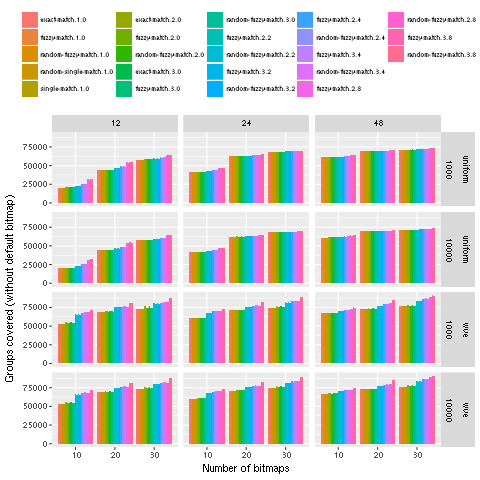

In [25]:
%%R -i groupsCoveredWithBitmapsOnly
ggplot(groupsCoveredWithBitmapsOnly) +
   geom_bar(aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
   xlab("Number of bitmaps") +
   ylab("Groups covered (without default bitmap)") +
   plotTheme

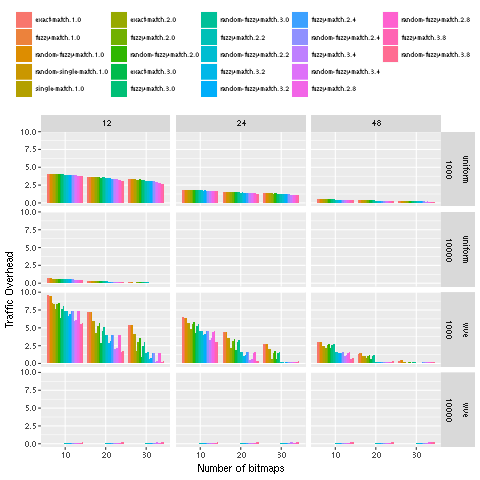

In [26]:
%%R -i trafficOverhead
ggplot(trafficOverhead) +
   geom_bar(aes(y=trafficOverhead, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme

In [27]:
overheads = leafSpineTraffic.groupby([
    'groupSizeDist', 'placementDist', 'colocateNumHostsPerLeaf', 'algorithm', 'numBitmaps', 'numLeafsPerBitmap', 
    'redundancyPerBitmap', 'numRulesPerLeaf', 'seed'])[
    ['unicastTraffic', 'multicastTraffic', 'baseeratTraffic', 'overlayTraffic']].agg('sum')
overheads.reset_index(inplace=True)

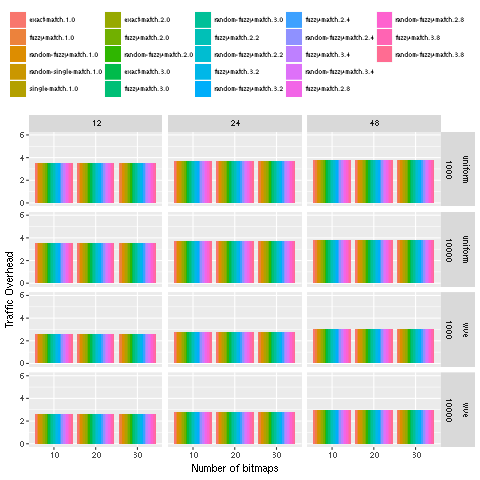

In [28]:
%%R -i overheads
ggplot(overheads) +
   geom_bar(aes(y=unicastTraffic/multicastTraffic, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity", position=position_dodge(),) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
   ylim(c(0, 6)) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme

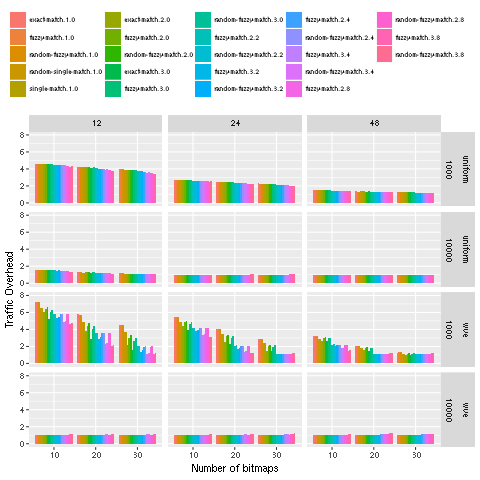

In [29]:
%%R -i overheads
ggplot(overheads) +
   geom_bar(aes(y=baseeratTraffic/multicastTraffic, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity", position=position_dodge(),) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
   ylim(c(0, 8)) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme

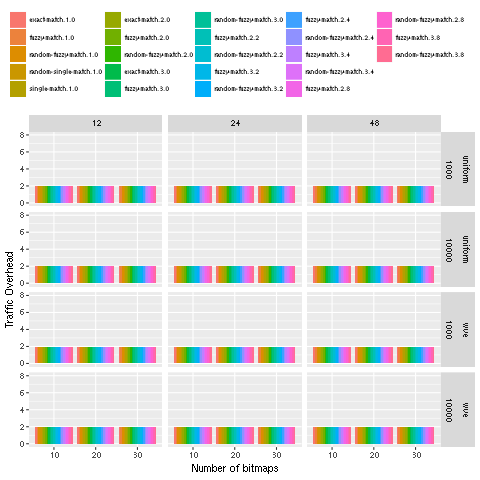

In [30]:
%%R -i overheads
ggplot(overheads) +
   geom_bar(aes(y=overlayTraffic/multicastTraffic, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity", position=position_dodge(),) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
   ylim(c(0, 8)) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme